In [12]:
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

In [13]:
X, y = make_classification(n_samples=1000, n_classes=2, weights= [0.9, 0.1], random_state=42)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cnn= CondensedNearestNeighbour()
X_train, y_train = cnn.fit_resample(X_train, y_train)


In [23]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [24]:
y_pred = knn.predict(X_test)

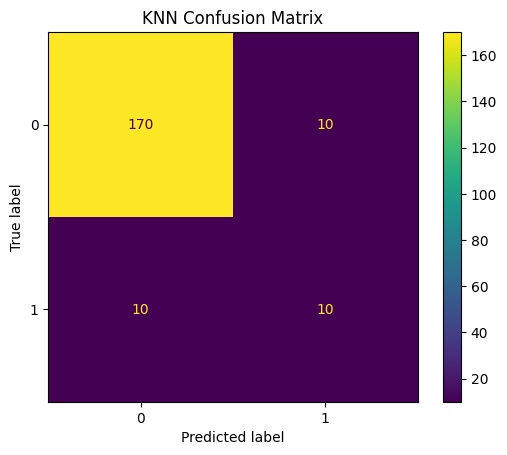

In [25]:
cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('KNN Confusion Matrix')
plt.show()

In [26]:
y_probs=knn.predict_proba(X_test)[:,1]


In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [28]:
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc}")

AUC: 0.8469444444444445


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


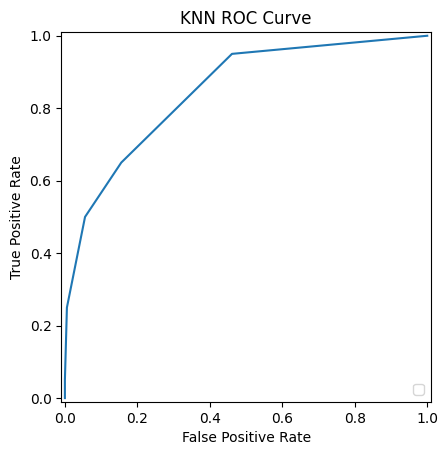

In [29]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('KNN ROC Curve')
plt.show()

In [30]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9
Precision: 0.5
Recall: 0.5
F1 Score: 0.5
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       180
           1       0.50      0.50      0.50        20

    accuracy                           0.90       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.90      0.90      0.90       200

